<a href="https://colab.research.google.com/github/tanyagupta1/Machine-Learning/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving income.csv to income (2).csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['income.csv']))

In [ ]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


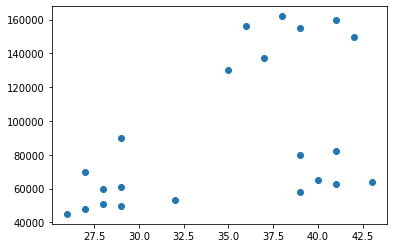

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'],df['Income($)'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(df[['Income($)']])
df['Income($)']=scalar.transform(df[['Income($)']])
df.head()

,Name,Age,Income($)
0,Rob,27,0.213675
1,Michael,29,0.384615
2,Mohan,29,0.136752
3,Ismail,28,0.128205
4,Kory,42,0.897436


In [ ]:
scalar=MinMaxScaler()
scalar.fit(df[['Age']])
df['Age']=scalar.transform(df[['Age']])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
df['cluster']=km.fit_predict(df[['Age','Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


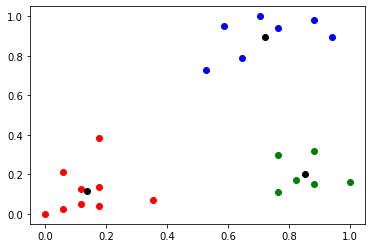

In [ ]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
plt.scatter(df0['Age'],df0['Income($)'],color='red')
plt.scatter(df1['Age'],df1['Income($)'],color='blue')
plt.scatter(df2['Age'],df2['Income($)'],color='green')
centroids=km.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],color='black')

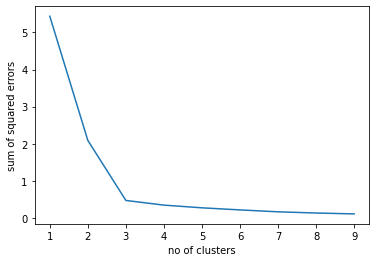

In [ ]:
k_range=range(1,10)
sse=[]
for k in k_range:
  km=KMeans(n_clusters=k)
  km.fit(df[['Age','Income($)']])
  sse.append(km.inertia_)
plt.xlabel('no of clusters')
plt.ylabel('sum of squared errors')
plt.plot(k_range,sse)